In [2]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multitest import multipletests
from statsmodels.stats.libqsturng import psturng
sns.set_context("talk",
                rc={
                    "font.size": 15,
                    "axes.titlesize": 15,
                    "axes.labelsize": 15
                })
%matplotlib notebook

## Import individual data 

In [3]:
#Import the file from the folder
#Flytable comes in txt, open with excel and then separate column with spaces in Text to columns option in excel
#Save the file in xlsx
#Add Body Lenght 
#Bear in mind that the order of things is teh same as the full table in the fully evaluated file
#We need to divide all the values by the calibration number to get the coordinated in mm

folder_path = "/Users/alexandravieiradasilva/Dropbox/Paper MS Bristes activation/Analysis AEP/Data Files/Backstim/"
file_name = "ntact_Jul_19_2023_Fly1_Results_.xlsx"
file_path = folder_path + file_name


try:
    dataframe = pd.read_excel(file_path, sheet_name='12.Full Data', skiprows=0)
    df_param = pd.read_excel(file_path, sheet_name='2.Parameters', skiprows=0)  #Extract body lenght and calib
    # Now you can work with the dataframe as needed
    #print(dataframe.head())
except FileNotFoundError:
    print(f"The file '{file_name}' in folder '{folder_path}' was not found.")
except IOError as e:
    print(f"An error occurred while trying to open the file: {e}")
    

    
#Create dataframe with important columns 
selected_Ccolumns = ['time','LeftFrontLegX','LeftMiddleLegX','LeftBackLegX','RightFrontLegX','RightMiddleLegX','RightBackLegX']
df_leg_coord = dataframe[selected_Ccolumns]


Calib = df_param.iloc[:,1][3]
Body_lenght_pix= df_param.iloc[:,1][6]
Body_lenght = (Body_lenght_pix)/Calib #Define Body Length important for normalization


### Function to transform coordinates in binary code: 0= Swing 1= stance 

In [4]:
# Make an empty data frame

Checker_plot = pd.DataFrame(columns=selected_Ccolumns)
Checker_plot['time'] = dataframe['time']


def get_step_phase(df_leg_coord):
    # Loop through all the legs
    Leg_types = ['LeftFrontLegX','LeftMiddleLegX', 'LeftBackLegX','RightFrontLegX','RightMiddleLegX',  'RightBackLegX' ]

    for leg_type in Leg_types:
        Leg_stance_phase = []  # Reset the list for each leg type

        # Transform this column in a list so we can iterate
        coordinates_list = df_leg_coord[leg_type].tolist()

        # Loop through all the values, when the leg is not touching the floor it's 0, when it is touching it's 1
        for i in range(len(coordinates_list)):
            if coordinates_list[i] == -1:
                Leg_stance_phase.append(0)
            else:
                Leg_stance_phase.append(1)
        Checker_plot[leg_type] = Leg_stance_phase

    return Checker_plot

#Example 
Checker_plot = get_step_phase(df_leg_coord)
#print(Checker_plot)    

### Plot Checker plots 

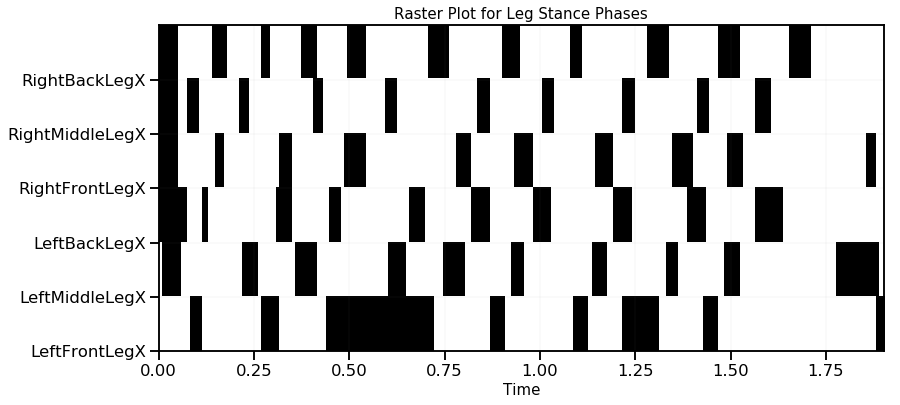

In [5]:
from matplotlib.colors import ListedColormap


# Create a custom colormap
Leg_types = ['LeftFrontLegX','LeftMiddleLegX', 'LeftBackLegX','RightFrontLegX','RightMiddleLegX', 'RightBackLegX' ]

cmap = ListedColormap(["black", "white"])
# Map values in the Checker_plot DataFrame to 1 (white) and 0 (black)
mapped_data = Checker_plot.iloc[:, 1:].applymap(lambda x: 1 if x == 1 else 0)
# Create the raster plot using imshow
plt.figure(figsize=(13, 6))
plt.imshow(mapped_data.T, cmap=cmap, aspect='auto', interpolation='nearest', extent=[Checker_plot['time'].min(), Checker_plot['time'].max(), 0, len(Leg_types)])
plt.title('Raster Plot for Leg Stance Phases')
plt.xlabel('Time')
#Leg_types = Leg_types[::-1]
plt.yticks(range(len(Leg_types)), Leg_types) 
# Add faint grid lines
plt.grid(linestyle='-', alpha=0.2,linewidth=0.4 ,color='gray')
plt.show()


### Function to get the Non compliance index for 1 video 

In [6]:
#Get the non compliance index

def counter_non_compliance(Checker_plot):
    Counter =0
    for i in range((Checker_plot.shape[0])):
        if (Checker_plot.iloc[i,[1,4]].values == [0.0, 0.0]).all():  #LF and RF Swing
            Counter += 1
            #print(Checker_plot['time'][i])
        elif (Checker_plot.iloc[i,[2,5]].values == [0.0, 0.0]).all(): #LM and RM swing
            Counter += 1
            #print(Checker_plot['time'][i])
        elif (Checker_plot.iloc[i,[3,6]].values == [0.0, 0.0]).all(): #LH and RH swing 
            Counter += 1
            #print(Checker_plot['time'][i])
        elif (Checker_plot.iloc[i,[1,2]].values == [0.0, 0.0]).all(): #LF and LM swing 
            Counter += 1
            #print(Checker_plot['time'][i])
        elif (Checker_plot.iloc[i,[2,3]].values == [0.0, 0.0]).all(): #LM and LH swing 
            Counter += 1
            #print(Checker_plot['time'][i])
        elif (Checker_plot.iloc[i,[4,5]].values == [0.0, 0.0]).all(): #RF and RM swing 
            Counter += 1
            #print(Checker_plot['time'][i])
        elif (Checker_plot.iloc[i,[5,6]].values == [0.0, 0.0]).all(): #RM and RH swing 
            Counter += 1
            #print(Checker_plot['time'][i])
    
    Non_compliance_index = (Counter/ Checker_plot.shape[0])
    #print(Non_compliance_index)
    return Non_compliance_index

Non_compliance_index = counter_non_compliance(Checker_plot)
#print(Non_compliance_index)

## Loop through all the files and get checker plots and Non compliance index

### Back stimuli 

['ntact_Jul_19_2023_Fly1_Results_.xlsx', 'ntact_Jul_24_2023_Fly5_Results_.xlsx', 'ntact_Jul_24_2023_Fly7_Results_.xlsx', 'ntact_Jul_24_2023_Fly9_Results_.xlsx', 't_Jul_24_2023_Fly3_cut_Results_.xlsx', 'tact_Aug_03_2023_Fly11_Results_.xlsx']
ntact_Jul_19_2023_Fly1_Results_.xlsx


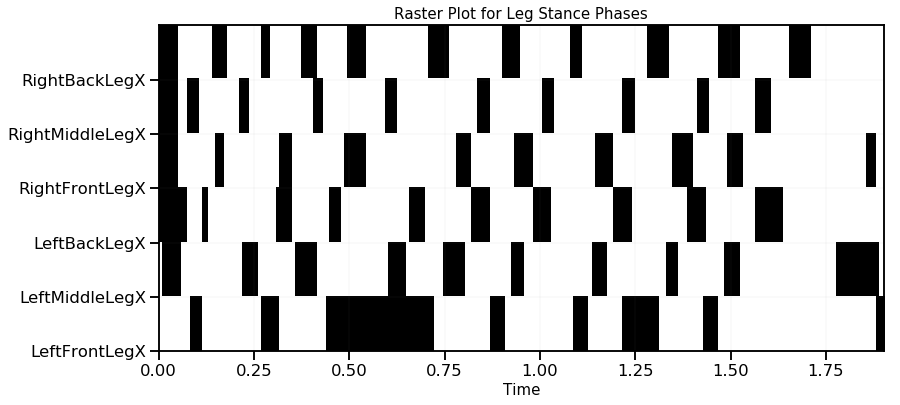

0.10212765957446808
ntact_Jul_24_2023_Fly5_Results_.xlsx


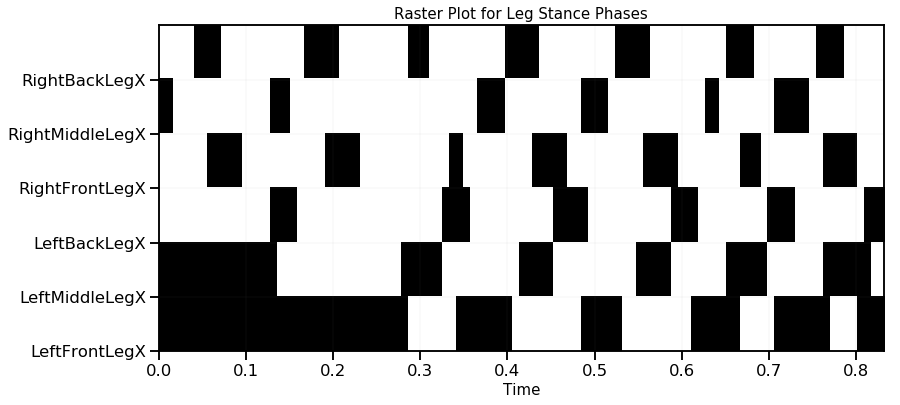

0.2761904761904762
ntact_Jul_24_2023_Fly7_Results_.xlsx


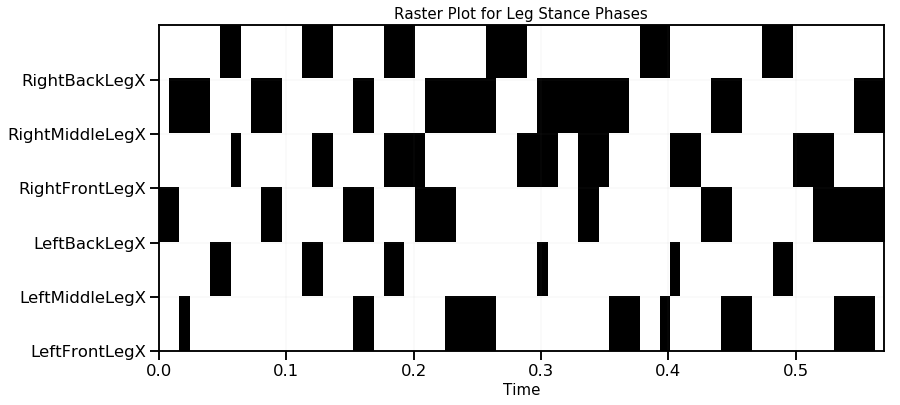

0.08450704225352113
ntact_Jul_24_2023_Fly9_Results_.xlsx


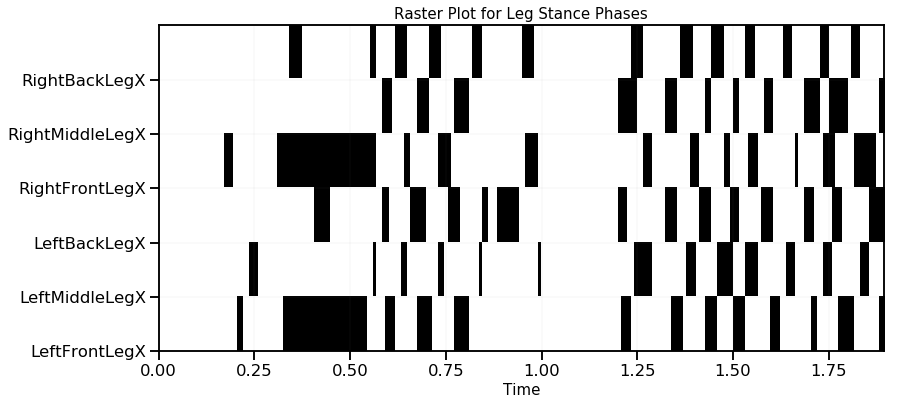

0.13675213675213677
t_Jul_24_2023_Fly3_cut_Results_.xlsx


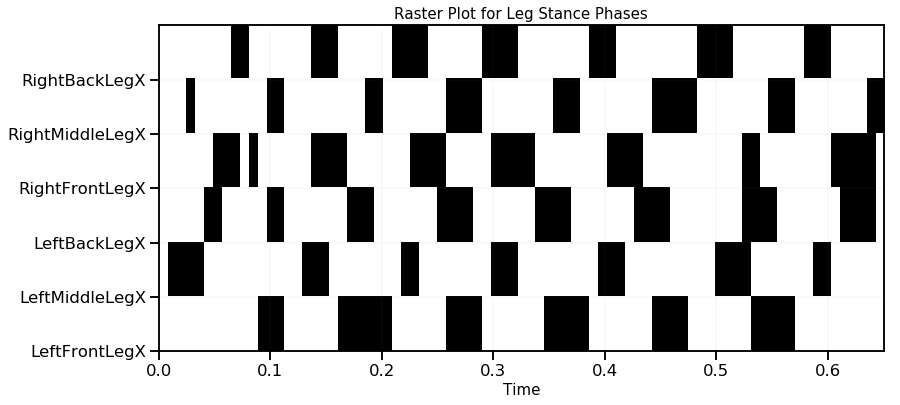

0.06172839506172839
tact_Aug_03_2023_Fly11_Results_.xlsx


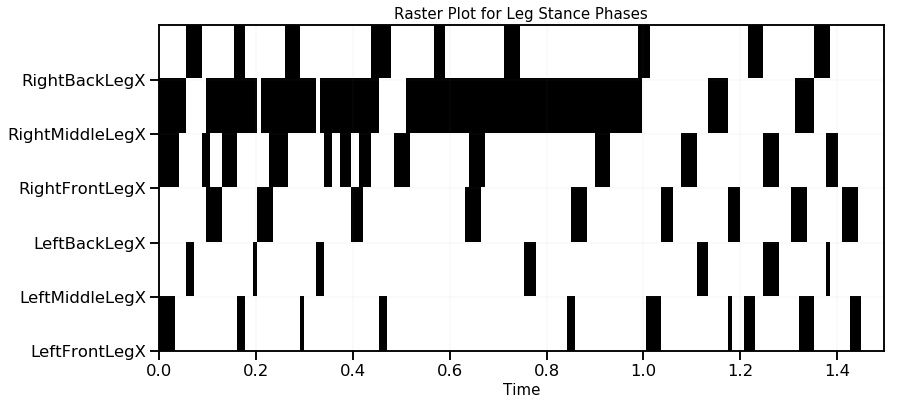

0.2810810810810811


In [7]:
import os

folder_path = "/Users/alexandravieiradasilva/Dropbox/Paper MS Bristes activation/Analysis AEP/Data Files/Backstim/"

try:
    # Get a list of all files and directories in the folder
    files_in_folder = os.listdir(folder_path)

    # Filter out only the files (excluding directories) from the list
    file_list = [file for file in files_in_folder if os.path.isfile(os.path.join(folder_path, file))]
    
    # Remove '.DS_Store' files from the list if they exist
    file_list = [file for file in file_list if file != '.DS_Store']

    #print("List of files in the folder:")
    #print(file_list)
    
except FileNotFoundError:
    print(f"The folder '{folder_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

print(file_list)

Non_compliance_index_all=[]
for file in file_list:
    print(file)
    file_path = folder_path + file
    dataframe = pd.read_excel(file_path, sheet_name='12.Full Data', skiprows=0)
    df_param = pd.read_excel(file_path, sheet_name='2.Parameters', skiprows=0)  #Extract body lenght and calib
    #Create dataframe with important columns 
    selected_Ccolumns = ['time','LeftFrontLegX','LeftMiddleLegX','LeftBackLegX','RightFrontLegX','RightMiddleLegX','RightBackLegX']
    df_leg_coord = dataframe[selected_Ccolumns]
    # Make an empty data frame
    Checker_plot = pd.DataFrame(columns=selected_Ccolumns)
    Checker_plot['time'] = dataframe['time']
    #Transform coordinates into binaary code 0 swing 1 stance
    Checker_plot = get_step_phase(df_leg_coord)
    # Create the Checker plot
    cmap = ListedColormap(["black", "white"])
    # Map values in the Checker_plot DataFrame to 1 (white) and 0 (black)
    mapped_data = Checker_plot.iloc[:, 1:].applymap(lambda x: 1 if x == 1 else 0)
    # Create the raster plot using imshow
    plt.figure(figsize=(13, 6))
    plt.imshow(mapped_data.T, cmap=cmap, aspect='auto', interpolation='nearest', extent=[Checker_plot['time'].min(), Checker_plot['time'].max(), 0, len(Leg_types)])
    plt.title('Raster Plot for Leg Stance Phases')
    plt.xlabel('Time')
    
    plt.yticks(range(len(Leg_types)), Leg_types) 
    # Add faint grid lines
    plt.grid(linestyle='-', alpha=0.2,linewidth=0.4 ,color='gray')
    plt.show()
    Non_compliance_index = counter_non_compliance(Checker_plot)
    Non_compliance_index_all.append(Non_compliance_index)
    print(Non_compliance_index)
    
Non_compliance_index_Backstim = pd.DataFrame(Non_compliance_index_all,columns=['BS'])


### Back Stim : Uncoordinated phase only 

['ntact_Jul_19_2023_Fly1_Results_.xlsx', 'ntact_Jul_24_2023_Fly5_Results_.xlsx', 'ntact_Jul_24_2023_Fly7_Results_.xlsx', 'ntact_Jul_24_2023_Fly9_Results_.xlsx', 't_Jul_24_2023_Fly3_cut_Results_.xlsx', 'tact_Aug_03_2023_Fly11_Results_.xlsx']
ntact_Jul_19_2023_Fly1_Results_.xlsx


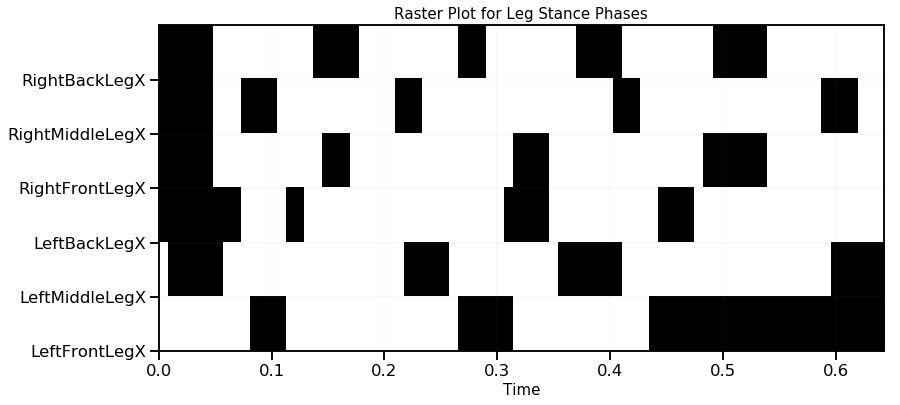

0.2875
ntact_Jul_24_2023_Fly5_Results_.xlsx


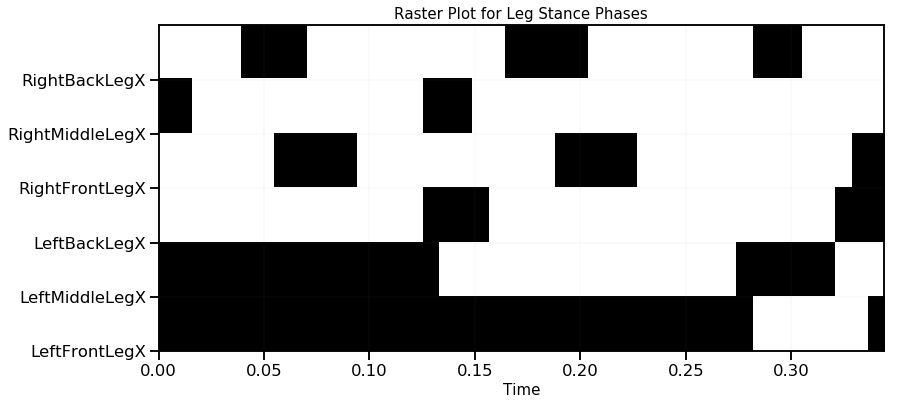

0.5454545454545454
ntact_Jul_24_2023_Fly7_Results_.xlsx


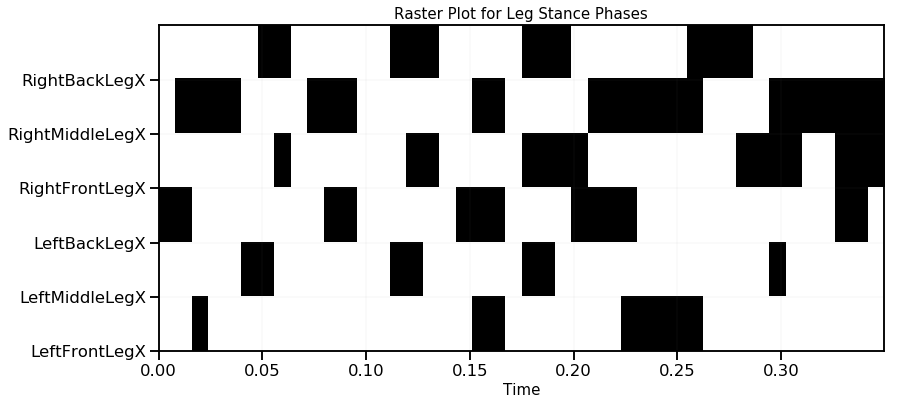

0.13636363636363635
ntact_Jul_24_2023_Fly9_Results_.xlsx


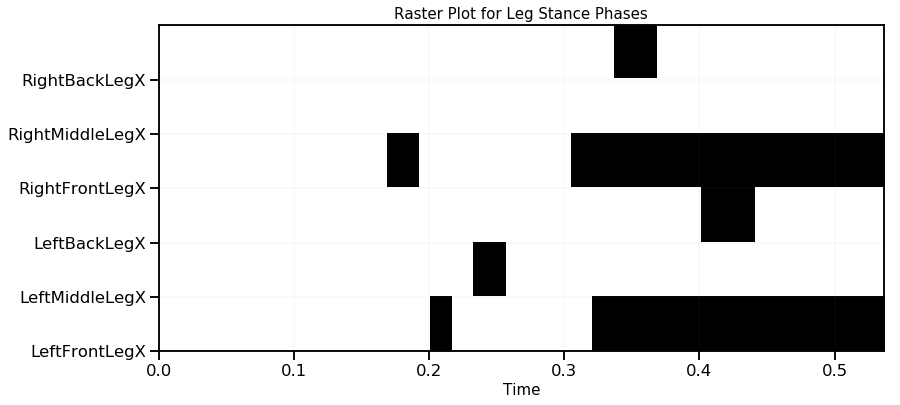

0.40298507462686567
t_Jul_24_2023_Fly3_cut_Results_.xlsx


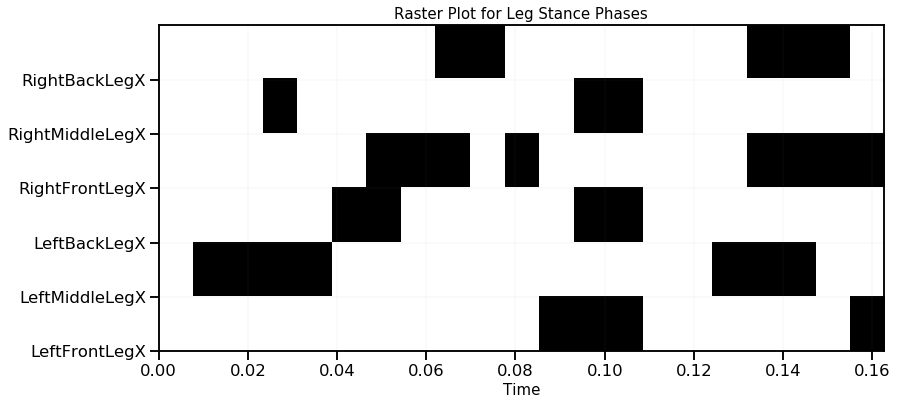

0.09523809523809523
tact_Aug_03_2023_Fly11_Results_.xlsx


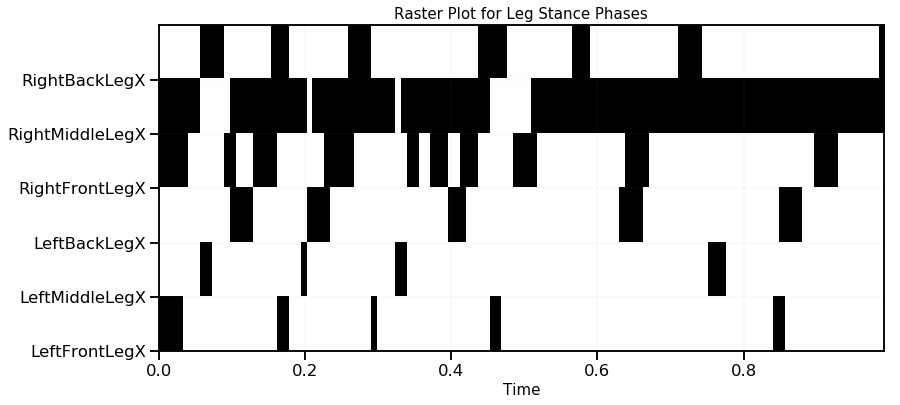

0.42276422764227645


In [8]:
import os

folder_path = "/Users/alexandravieiradasilva/Dropbox/Paper MS Bristes activation/Analysis AEP/Data Files/Backstim_UP/"

try:
    # Get a list of all files and directories in the folder
    files_in_folder = os.listdir(folder_path)

    # Filter out only the files (excluding directories) from the list
    file_list = [file for file in files_in_folder if os.path.isfile(os.path.join(folder_path, file))]
    
    # Remove '.DS_Store' files from the list if they exist
    file_list = [file for file in file_list if file != '.DS_Store']

    #print("List of files in the folder:")
    #print(file_list)
    
except FileNotFoundError:
    print(f"The folder '{folder_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

print(file_list)

Non_compliance_index_all=[]
for file in file_list:
    print(file)
    file_path = folder_path + file
    dataframe = pd.read_excel(file_path, sheet_name='12.Full Data', skiprows=0)
    df_param = pd.read_excel(file_path, sheet_name='2.Parameters', skiprows=0)  #Extract body lenght and calib
    #Create dataframe with important columns 
    selected_Ccolumns = ['time','LeftFrontLegX','LeftMiddleLegX','LeftBackLegX','RightFrontLegX','RightMiddleLegX','RightBackLegX']
    df_leg_coord = dataframe[selected_Ccolumns]
    # Make an empty data frame
    Checker_plot = pd.DataFrame(columns=selected_Ccolumns)
    Checker_plot['time'] = dataframe['time']
    #Transform coordinates into binaary code 0 swing 1 stance
    Checker_plot = get_step_phase(df_leg_coord)
    # Create the Checker plot
    cmap = ListedColormap(["black", "white"])
    # Map values in the Checker_plot DataFrame to 1 (white) and 0 (black)
    mapped_data = Checker_plot.iloc[:, 1:].applymap(lambda x: 1 if x == 1 else 0)
    # Create the raster plot using imshow
    plt.figure(figsize=(13, 6))
    plt.imshow(mapped_data.T, cmap=cmap, aspect='auto', interpolation='nearest', extent=[Checker_plot['time'].min(), Checker_plot['time'].max(), 0, len(Leg_types)])
    plt.title('Raster Plot for Leg Stance Phases')
    plt.xlabel('Time')
    
    plt.yticks(range(len(Leg_types)), Leg_types) 
    # Add faint grid lines
    plt.grid(linestyle='-', alpha=0.2,linewidth=0.4 ,color='gray')
    plt.show()
    Non_compliance_index = counter_non_compliance(Checker_plot)
    Non_compliance_index_all.append(Non_compliance_index)
    print(Non_compliance_index)
    
Non_compliance_index_Backstim_UP = pd.DataFrame(Non_compliance_index_all,columns=['BS_UP'])


### Back Stim: Coordinated Phase

['ntact_Jul_19_2023_Fly1_Results_.xlsx', 'ntact_Jul_24_2023_Fly5_Results_.xlsx', 'ntact_Jul_24_2023_Fly7_Results_.xlsx', 'ntact_Jul_24_2023_Fly9_Results_.xlsx', 't_Jul_24_2023_Fly3_cut_Results_.xlsx', 'tact_Aug_03_2023_Fly11_Results_.xlsx']
ntact_Jul_19_2023_Fly1_Results_.xlsx


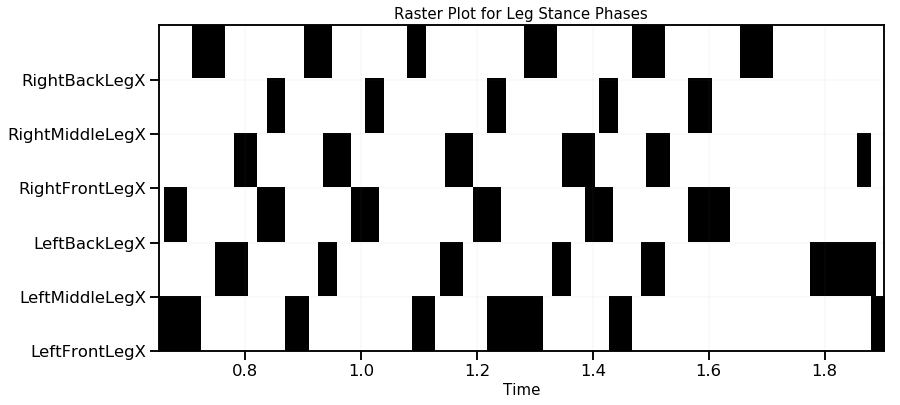

0.0064516129032258064
ntact_Jul_24_2023_Fly5_Results_.xlsx


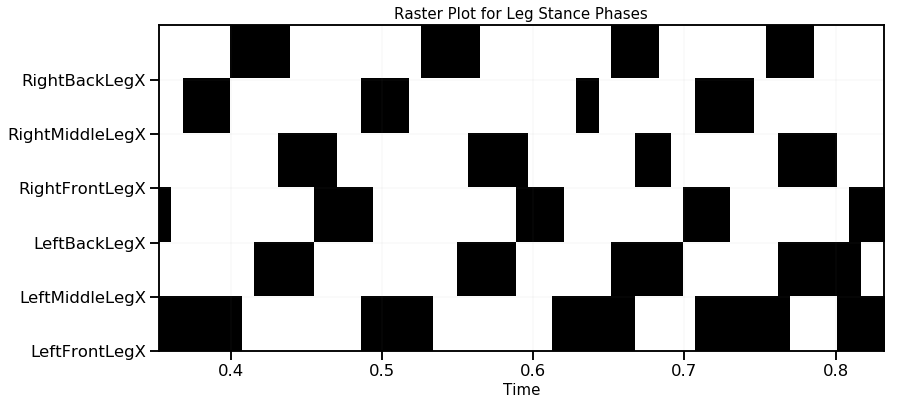

0.08196721311475409
ntact_Jul_24_2023_Fly7_Results_.xlsx


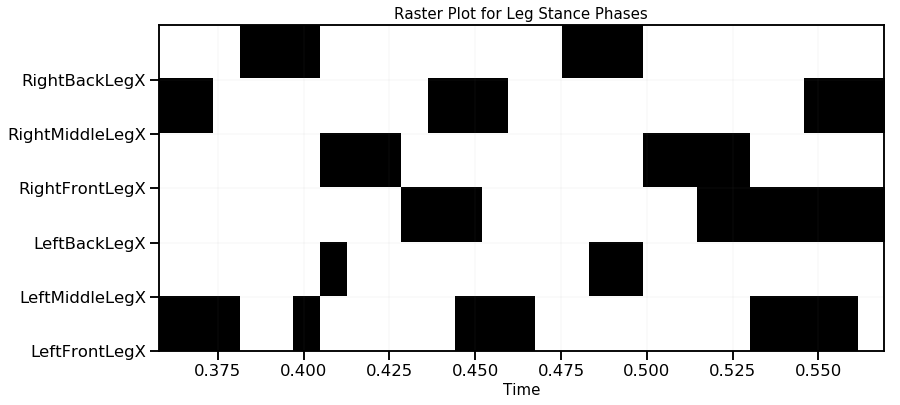

0.0
ntact_Jul_24_2023_Fly9_Results_.xlsx


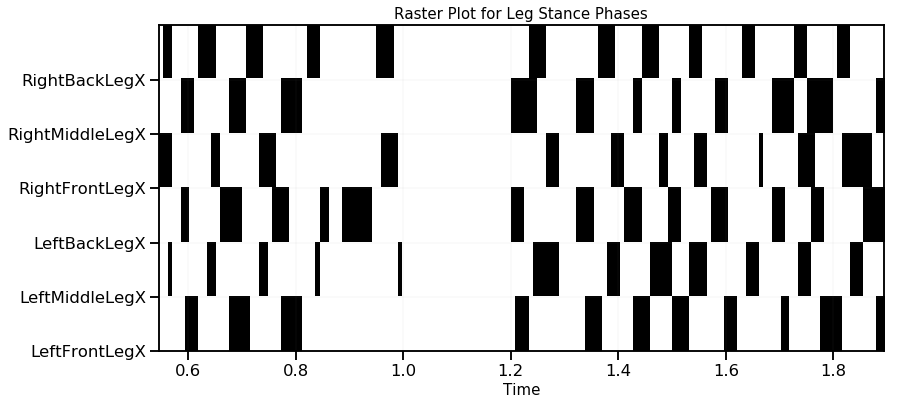

0.029940119760479042
t_Jul_24_2023_Fly3_cut_Results_.xlsx


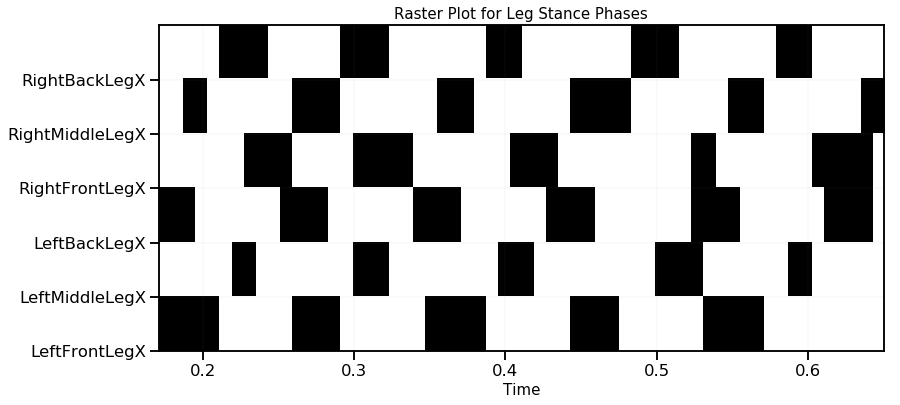

0.05
tact_Aug_03_2023_Fly11_Results_.xlsx


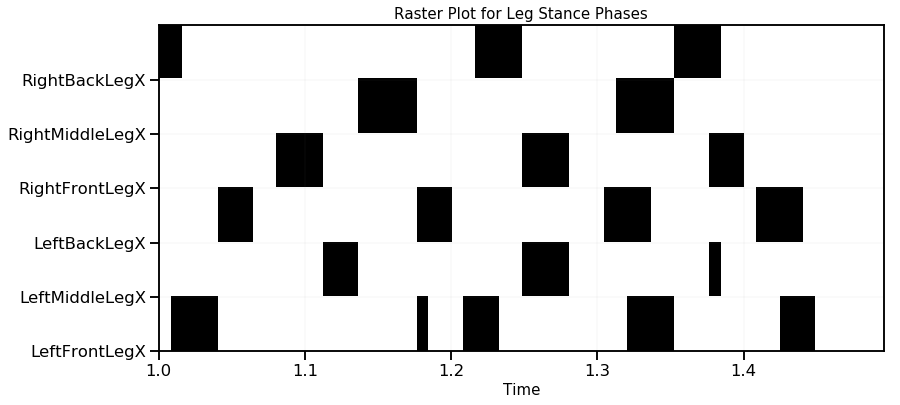

0.0


In [9]:
import os

folder_path = "/Users/alexandravieiradasilva/Dropbox/Paper MS Bristes activation/Analysis AEP/Data Files/BackStim_CP/"

try:
    # Get a list of all files and directories in the folder
    files_in_folder = os.listdir(folder_path)

    # Filter out only the files (excluding directories) from the list
    file_list = [file for file in files_in_folder if os.path.isfile(os.path.join(folder_path, file))]
    
    # Remove '.DS_Store' files from the list if they exist
    file_list = [file for file in file_list if file != '.DS_Store']

    #print("List of files in the folder:")
    #print(file_list)
    
except FileNotFoundError:
    print(f"The folder '{folder_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

print(file_list)

Non_compliance_index_all=[]
for file in file_list:
    print(file)
    file_path = folder_path + file
    dataframe = pd.read_excel(file_path, sheet_name='12.Full Data', skiprows=0)
    df_param = pd.read_excel(file_path, sheet_name='2.Parameters', skiprows=0)  #Extract body lenght and calib
    #Create dataframe with important columns 
    selected_Ccolumns = ['time','LeftFrontLegX','LeftMiddleLegX','LeftBackLegX','RightFrontLegX','RightMiddleLegX','RightBackLegX']
    df_leg_coord = dataframe[selected_Ccolumns]
    # Make an empty data frame
    Checker_plot = pd.DataFrame(columns=selected_Ccolumns)
    Checker_plot['time'] = dataframe['time']
    #Transform coordinates into binaary code 0 swing 1 stance
    Checker_plot = get_step_phase(df_leg_coord)
    # Create the Checker plot
    cmap = ListedColormap(["black", "white"])
    # Map values in the Checker_plot DataFrame to 1 (white) and 0 (black)
    mapped_data = Checker_plot.iloc[:, 1:].applymap(lambda x: 1 if x == 1 else 0)
    # Create the raster plot using imshow
    plt.figure(figsize=(13, 6))
    plt.imshow(mapped_data.T, cmap=cmap, aspect='auto', interpolation='nearest', extent=[Checker_plot['time'].min(), Checker_plot['time'].max(), 0, len(Leg_types)])
    plt.title('Raster Plot for Leg Stance Phases')
    plt.xlabel('Time')
    
    plt.yticks(range(len(Leg_types)), Leg_types) 
    # Add faint grid lines
    plt.grid(linestyle='-', alpha=0.2,linewidth=0.4 ,color='gray')
    plt.show()
    Non_compliance_index = counter_non_compliance(Checker_plot)
    Non_compliance_index_all.append(Non_compliance_index)
    print(Non_compliance_index)
    
Non_compliance_index_Backstim_CP = pd.DataFrame(Non_compliance_index_all,columns=['BSCP'])


### Front Stim 

['FlyTable_11F.xlsx', 'FlyTable_3F.xlsx', 'FlyTable_5F.xlsx', 'FlyTable_6F.xlsx', 'FlyTable_7F.xlsx', 'FlyTable_9F.xlsx']
FlyTable_11F.xlsx


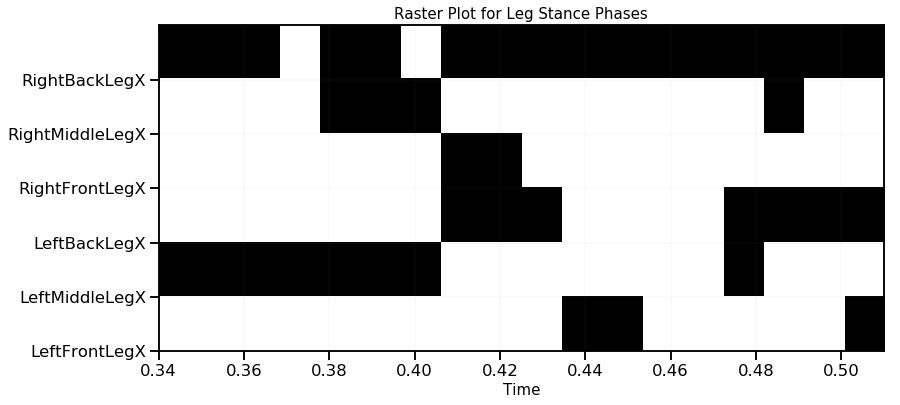

0.5555555555555556
FlyTable_3F.xlsx


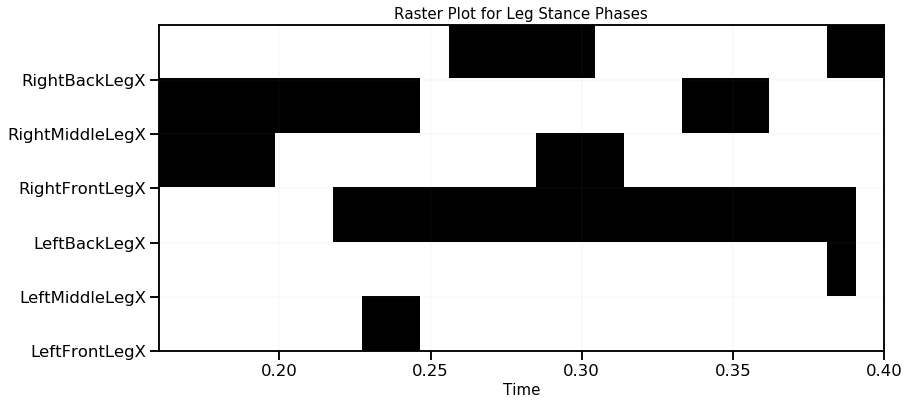

0.4
FlyTable_5F.xlsx


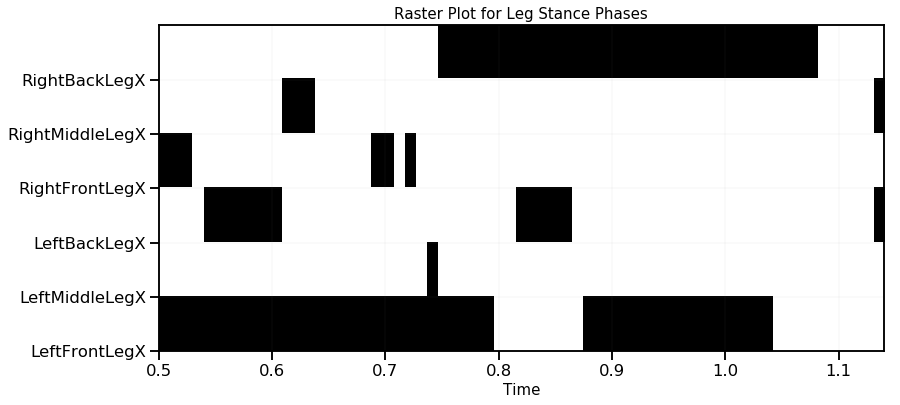

0.18461538461538463
FlyTable_6F.xlsx


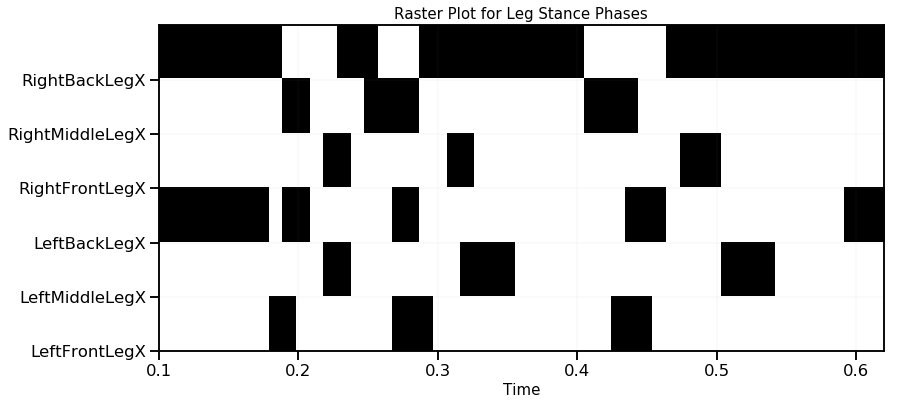

0.22641509433962265
FlyTable_7F.xlsx


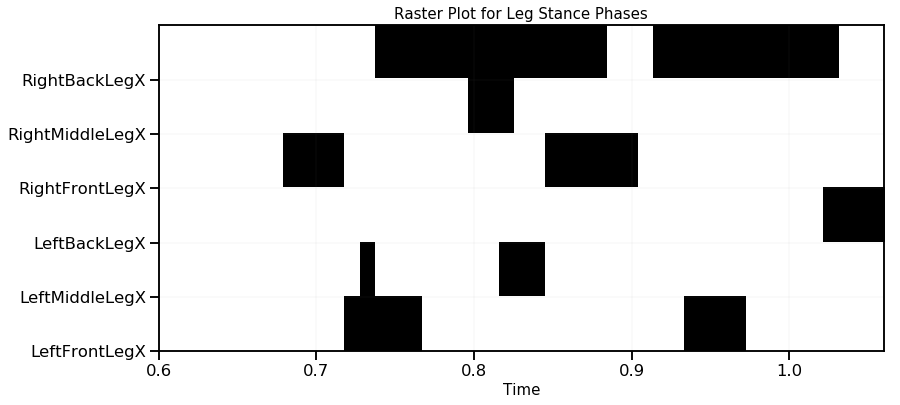

0.10638297872340426
FlyTable_9F.xlsx


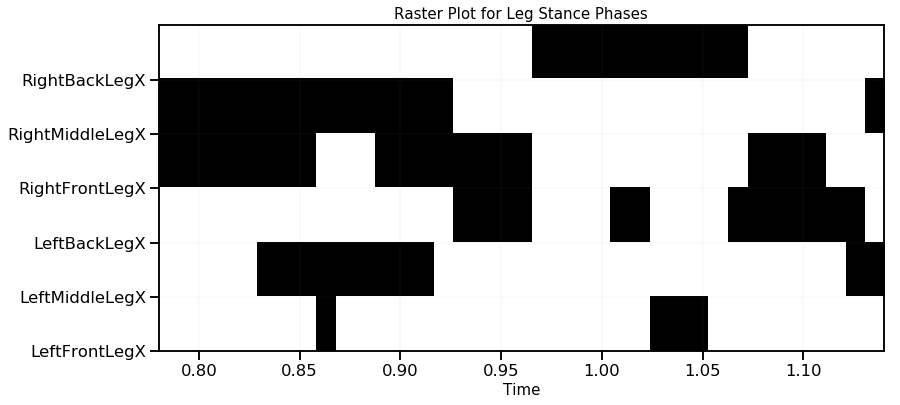

0.5405405405405406


In [10]:
import os

folder_path = "/Users/alexandravieiradasilva/Dropbox/Paper MS Bristes activation/Analysis AEP/Data_nonev/"

try:
    # Get a list of all files and directories in the folder
    files_in_folder = os.listdir(folder_path)

    # Filter out only the files (excluding directories) from the list
    file_list = [file for file in files_in_folder if os.path.isfile(os.path.join(folder_path, file))]
    
    # Remove '.DS_Store' files from the list if they exist
    file_list = [file for file in file_list if file != '.DS_Store']

    #print("List of files in the folder:")
    #print(file_list)
    
except FileNotFoundError:
    print(f"The folder '{folder_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

print(file_list)

df_AEP_PEP_allflies=[]
Non_compliance_index_all = []  # Clear the list before the loop
for file in file_list:
    print(file)
    file_path = folder_path + file
    dataframe = pd.read_excel(file_path, sheet_name='FlyTable', skiprows=0)
    #Create dataframe with important columns 
    #Create dataframe with important columns 
    selected_Ccolumns = ['time','LeftFrontLegX','LeftMiddleLegX','LeftBackLegX','RightFrontLegX','RightMiddleLegX','RightBackLegX']
    df_leg_coord = dataframe[selected_Ccolumns]
    # Make an empty data frame
    Checker_plot = pd.DataFrame(columns=selected_Ccolumns)
    Checker_plot['time'] = dataframe['time']
    Checker_plot = get_step_phase(df_leg_coord)
    # Create the Checker plot
    cmap = ListedColormap(["black", "white"])
    # Map values in the Checker_plot DataFrame to 1 (white) and 0 (black)
    mapped_data = Checker_plot.iloc[:, 1:].applymap(lambda x: 1 if x == 1 else 0)
    # Create the raster plot using imshow
    plt.figure(figsize=(13, 6))
    plt.imshow(mapped_data.T, cmap=cmap, aspect='auto', interpolation='nearest', extent=[Checker_plot['time'].min(), Checker_plot['time'].max(), 0, len(Leg_types)])
    plt.title('Raster Plot for Leg Stance Phases')
    plt.xlabel('Time')
    
    plt.yticks(range(len(Leg_types)), Leg_types) 
    # Add faint grid lines
    plt.grid(linestyle='-', alpha=0.2,linewidth=0.4 ,color='gray')
    plt.show()
    Non_compliance_index_FS = counter_non_compliance(Checker_plot)
    Non_compliance_index_all.append(Non_compliance_index_FS)
    print(Non_compliance_index_FS)
    
Non_compliance_index_Frontstim = pd.DataFrame(Non_compliance_index_all,columns=['FS'])


### Control Back Stim

['FlyTable_1.xlsx', 'FlyTable_2.xlsx', 'FlyTable_3.xlsx', 'FlyTable_4.xlsx', 'FlyTable_6.xlsx']
FlyTable_1.xlsx


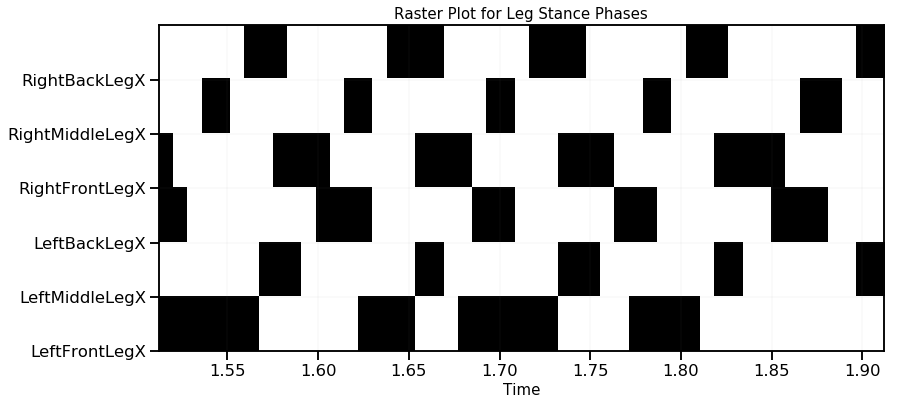

0.0392156862745098
FlyTable_2.xlsx


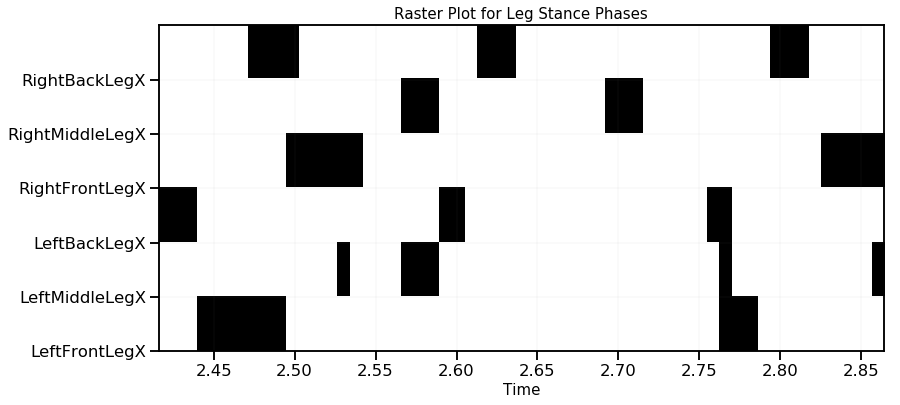

0.07017543859649122
FlyTable_3.xlsx


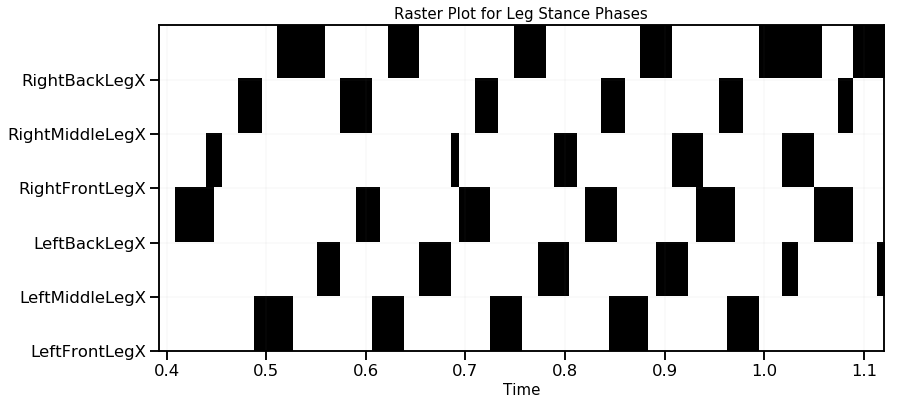

0.010869565217391304
FlyTable_4.xlsx


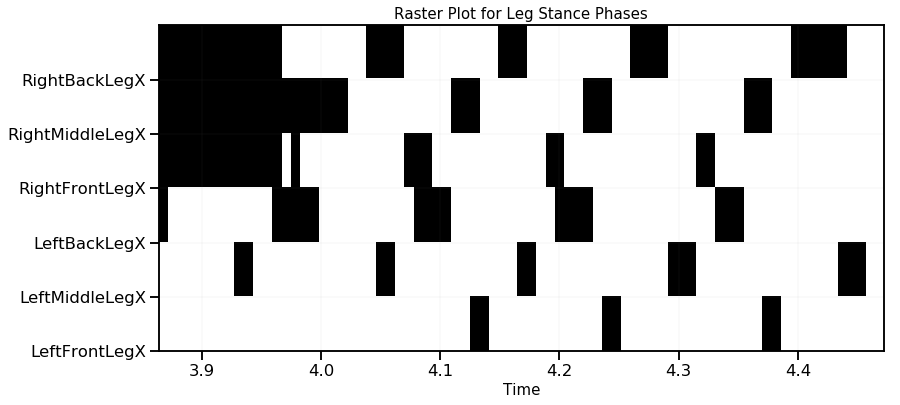

0.18181818181818182
FlyTable_6.xlsx


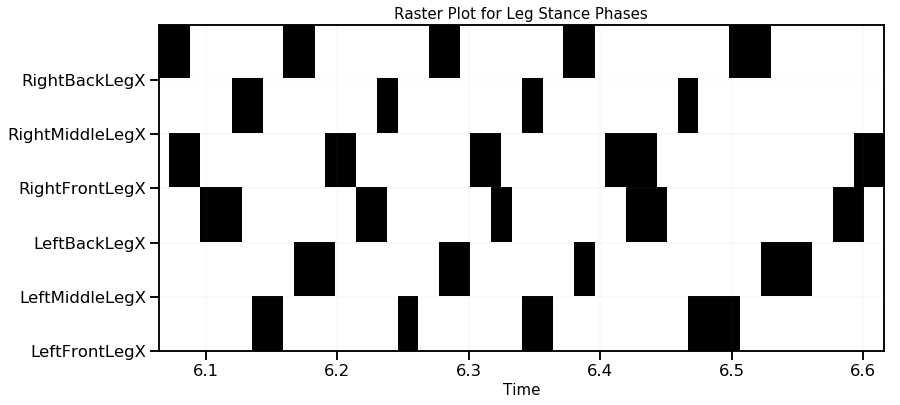

0.0


In [11]:
import os

folder_path = "/Users/alexandravieiradasilva/Dropbox/Paper MS Bristes activation/Analysis AEP/Data_Control/Back_Stim/"

try:
    # Get a list of all files and directories in the folder
    files_in_folder = os.listdir(folder_path)

    # Filter out only the files (excluding directories) from the list
    file_list = [file for file in files_in_folder if os.path.isfile(os.path.join(folder_path, file))]
    
    # Remove '.DS_Store' files from the list if they exist
    file_list = [file for file in file_list if file != '.DS_Store']

    #print("List of files in the folder:")
    #print(file_list)
    
except FileNotFoundError:
    print(f"The folder '{folder_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

print(file_list)

df_AEP_PEP_allflies=[]
Non_compliance_index_all = []  # Clear the list before the loop
for file in file_list:
    print(file)
    file_path = folder_path + file
    dataframe = pd.read_excel(file_path, sheet_name='FlyTable', skiprows=0)
    #Create dataframe with important columns 
    #Create dataframe with important columns 
    selected_Ccolumns = ['time','LeftFrontLegX','LeftMiddleLegX','LeftBackLegX','RightFrontLegX','RightMiddleLegX','RightBackLegX']
    df_leg_coord = dataframe[selected_Ccolumns]
    # Make an empty data frame
    Checker_plot = pd.DataFrame(columns=selected_Ccolumns)
    Checker_plot['time'] = dataframe['time']
    Checker_plot = get_step_phase(df_leg_coord)
    # Create the Checker plot
    cmap = ListedColormap(["black", "white"])
    # Map values in the Checker_plot DataFrame to 1 (white) and 0 (black)
    mapped_data = Checker_plot.iloc[:, 1:].applymap(lambda x: 1 if x == 1 else 0)
    # Create the raster plot using imshow
    plt.figure(figsize=(13, 6))
    plt.imshow(mapped_data.T, cmap=cmap, aspect='auto', interpolation='nearest', extent=[Checker_plot['time'].min(), Checker_plot['time'].max(), 0, len(Leg_types)])
    plt.title('Raster Plot for Leg Stance Phases')
    plt.xlabel('Time')
    
    plt.yticks(range(len(Leg_types)), Leg_types) 
    # Add faint grid lines
    plt.grid(linestyle='-', alpha=0.2,linewidth=0.4 ,color='gray')
    plt.show()
    Non_compliance_index_CBS = counter_non_compliance(Checker_plot)
    Non_compliance_index_all.append(Non_compliance_index_CBS)
    print(Non_compliance_index_CBS)
    
Non_compliance_index_ControlBackstim = pd.DataFrame(Non_compliance_index_all,columns=['CBS'])


### Control Front Stim

['FlyTable_1F.xlsx', 'FlyTable_2F.xlsx', 'FlyTable_3F.xlsx', 'FlyTable_4F_new.xlsx', 'FlyTable_6F_new.xlsx']
FlyTable_1F.xlsx


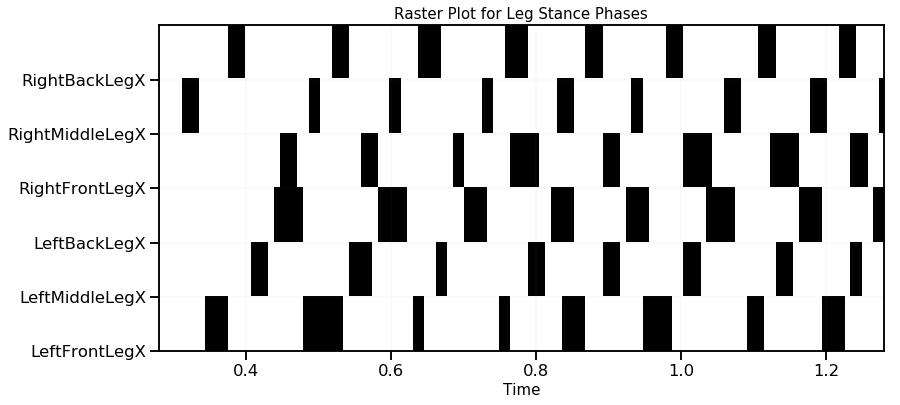

0.0
FlyTable_2F.xlsx


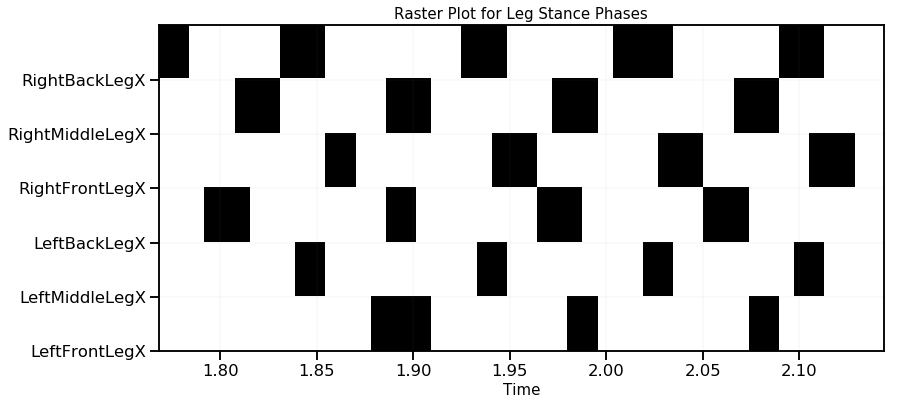

0.0
FlyTable_3F.xlsx


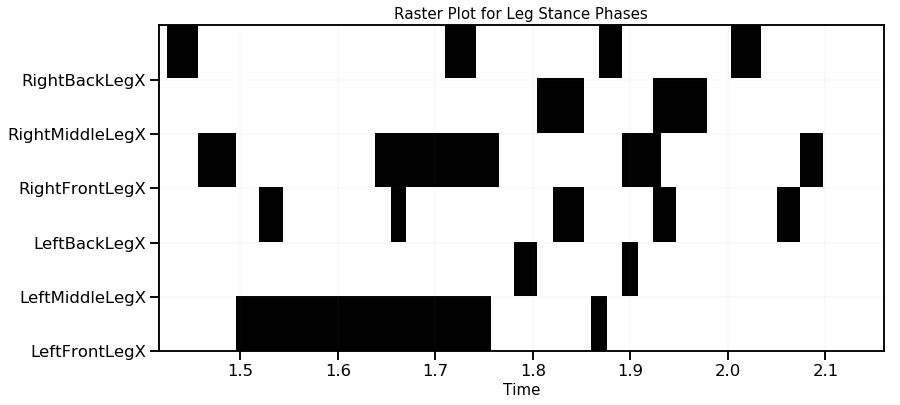

0.1702127659574468
FlyTable_4F_new.xlsx


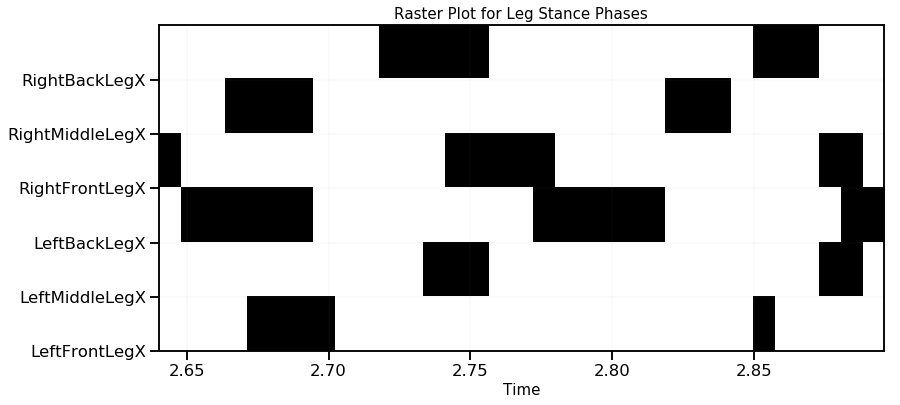

0.030303030303030304
FlyTable_6F_new.xlsx


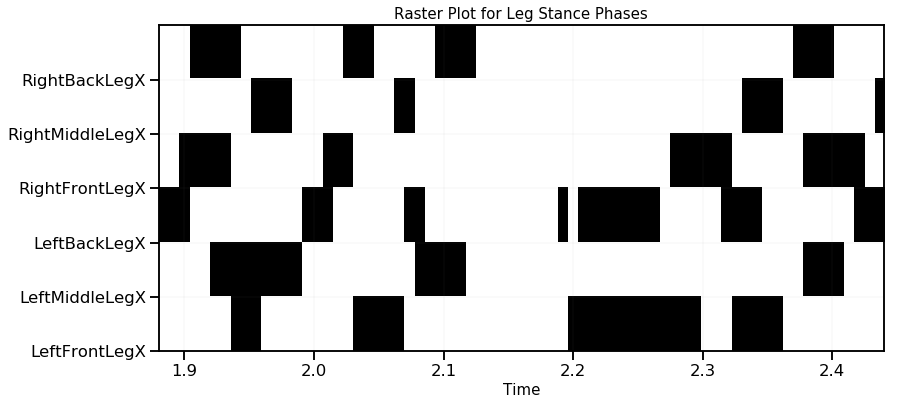

0.14084507042253522
        CFS
0  0.000000
1  0.000000
2  0.170213
3  0.030303
4  0.140845


In [12]:
import os

folder_path = "/Users/alexandravieiradasilva/Dropbox/Paper MS Bristes activation/Analysis AEP/Data_Control/Front_Stim/"

try:
    # Get a list of all files and directories in the folder
    files_in_folder = os.listdir(folder_path)

    # Filter out only the files (excluding directories) from the list
    file_list = [file for file in files_in_folder if os.path.isfile(os.path.join(folder_path, file))]
    
    # Remove '.DS_Store' files from the list if they exist
    file_list = [file for file in file_list if file != '.DS_Store']

    #print("List of files in the folder:")
    #print(file_list)
    
except FileNotFoundError:
    print(f"The folder '{folder_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

print(file_list)

df_AEP_PEP_allflies=[]
Non_compliance_index_all = []  # Clear the list before the loop
for file in file_list:
    print(file)
    file_path = folder_path + file
    dataframe = pd.read_excel(file_path, sheet_name='FlyTable', skiprows=0)
    #Create dataframe with important columns 
    #Create dataframe with important columns 
    selected_Ccolumns = ['time','LeftFrontLegX','LeftMiddleLegX','LeftBackLegX','RightFrontLegX','RightMiddleLegX','RightBackLegX']
    df_leg_coord = dataframe[selected_Ccolumns]
    # Make an empty data frame
    Checker_plot = pd.DataFrame(columns=selected_Ccolumns)
    Checker_plot['time'] = dataframe['time']
    Checker_plot = get_step_phase(df_leg_coord)
    # Create the Checker plot
    cmap = ListedColormap(["black", "white"])
    # Map values in the Checker_plot DataFrame to 1 (white) and 0 (black)
    mapped_data = Checker_plot.iloc[:, 1:].applymap(lambda x: 1 if x == 1 else 0)
    # Create the raster plot using imshow
    plt.figure(figsize=(13, 6))
    plt.imshow(mapped_data.T, cmap=cmap, aspect='auto', interpolation='nearest', extent=[Checker_plot['time'].min(), Checker_plot['time'].max(), 0, len(Leg_types)])
    plt.title('Raster Plot for Leg Stance Phases')
    plt.xlabel('Time')
    
    plt.yticks(range(len(Leg_types)), Leg_types) 
    # Add faint grid lines
    plt.grid(linestyle='-', alpha=0.2,linewidth=0.4 ,color='gray')
    plt.show()
    Non_compliance_index_CFS = counter_non_compliance(Checker_plot)
    Non_compliance_index_all.append(Non_compliance_index_CFS)
    print(Non_compliance_index_CFS)
    
Non_compliance_index_ControlFrontstim = pd.DataFrame(Non_compliance_index_all,columns=['CFS'])

print(Non_compliance_index_ControlFrontstim)


### Boxplots NC index for each condition

        CBS       CFS     BS_UP      BSCP        FS
0  0.039216  0.000000  0.287500  0.006452  0.555556
1  0.070175  0.000000  0.545455  0.081967  0.400000
2  0.010870  0.170213  0.136364  0.000000  0.184615
3  0.181818  0.030303  0.402985  0.029940  0.226415
4  0.000000  0.140845  0.095238  0.050000  0.106383
5       NaN       NaN  0.422764  0.000000  0.540541


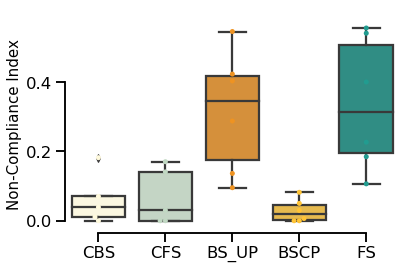

In [13]:
Non_comp_plot = pd.concat([Non_compliance_index_ControlBackstim, Non_compliance_index_ControlFrontstim,Non_compliance_index_Backstim_UP, Non_compliance_index_Backstim_CP,Non_compliance_index_Frontstim], axis=1)

print(Non_comp_plot)

Non_comp_plot.to_csv('Non_comp_plot.csv')

Laserstim_pallette = ['#FFFADD','#C1D8C3','#EE9322','#FFC436','#219C90']
sns.set_palette(Laserstim_pallette)

plt.figure(figsize=(6,4))
sns.boxplot(data=Non_comp_plot )
sns.swarmplot(data=Non_comp_plot)
sns.despine( trim=True)

plt.ylabel("Non-Compliance Index")

plt.savefig('Non_compliance_Indx_laserstim.svg')
plt.show()

In [14]:
print(Non_comp_plot)

        CBS       CFS     BS_UP      BSCP        FS
0  0.039216  0.000000  0.287500  0.006452  0.555556
1  0.070175  0.000000  0.545455  0.081967  0.400000
2  0.010870  0.170213  0.136364  0.000000  0.184615
3  0.181818  0.030303  0.402985  0.029940  0.226415
4  0.000000  0.140845  0.095238  0.050000  0.106383
5       NaN       NaN  0.422764  0.000000  0.540541


        CBS     BS_UP      BSCP
0  0.039216  0.287500  0.006452
1  0.070175  0.545455  0.081967
2  0.010870  0.136364  0.000000
3  0.181818  0.402985  0.029940
4  0.000000  0.095238  0.050000
5       NaN  0.422764  0.000000


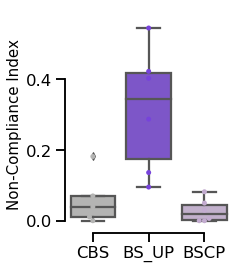

In [34]:
Non_comp_plot = pd.concat([Non_compliance_index_ControlBackstim,Non_compliance_index_Backstim_UP, Non_compliance_index_Backstim_CP], axis=1)

print(Non_comp_plot)

Non_comp_plot.to_csv('Non_comp_plot.csv')

Laserstim_pallette = ['#B4B4B3','#7743DB','#C3ACD0']
sns.set_palette(Laserstim_pallette)

plt.figure(figsize=(3,4))
sns.boxplot(data=Non_comp_plot )
sns.swarmplot(data=Non_comp_plot)
sns.despine( trim=True)

plt.ylabel("Non-Compliance Index")

plt.savefig('Non_compliance_Indx_laserstimBS.svg')
plt.show()

        CFS        FS
0  0.000000  0.555556
1  0.000000  0.400000
2  0.170213  0.184615
3  0.030303  0.226415
4  0.140845  0.106383
5       NaN  0.540541


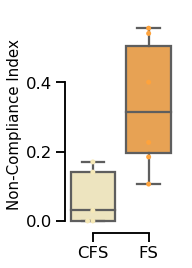

In [31]:
Non_comp_plot = pd.concat([ Non_compliance_index_ControlFrontstim, Non_compliance_index_Frontstim], axis=1)

print(Non_comp_plot)

Non_comp_plot.to_csv('Non_comp_plot.csv')

Laserstim_pallette = ['#F5E8B7','#FFA33C','#EE9322']
sns.set_palette(Laserstim_pallette)

plt.figure(figsize=(2,4))
sns.boxplot(data=Non_comp_plot )
sns.swarmplot(data=Non_comp_plot)
sns.despine( trim=True)

plt.ylabel("Non-Compliance Index")

plt.savefig('Non_compliance_Indx_laserstim_Fs.svg')
plt.show()